In [3]:
from sklearn.datasets import load_wine
import pandas as pd

# Cargar el dataset desde sklearn
wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target

# Mostrar las primeras filas
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
# Inspección de la variable objetivo
df['target'].value_counts()

# Mostrar clases posibles
print("Clases únicas:", df['target'].unique())


Clases únicas: [0 1 2]


In [5]:
# Ya viene codificada, pero podemos mapear nombres para claridad
target_names = wine.target_names
df['target_label'] = df['target'].map({i: name for i, name in enumerate(target_names)})

df[['target', 'target_label']].drop_duplicates()


,target,target_label
0,0,class_0
59,1,class_1
130,2,class_2


In [6]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Selección de variables numéricas
features = wine.feature_names

# Aplicar MinMaxScaler
minmax = MinMaxScaler()
df_minmax = pd.DataFrame(minmax.fit_transform(df[features]), columns=[f + '_minmax' for f in features])

# Aplicar StandardScaler
standard = StandardScaler()
df_standard = pd.DataFrame(standard.fit_transform(df[features]), columns=[f + '_zscore' for f in features])

# Combinar para comparación
df_scaled = pd.concat([df[features], df_minmax, df_standard], axis=1)
df_scaled.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,...,alcalinity_of_ash_zscore,magnesium_zscore,total_phenols_zscore,flavanoids_zscore,nonflavanoid_phenols_zscore,proanthocyanins_zscore,color_intensity_zscore,hue_zscore,od280/od315_of_diluted_wines_zscore,proline_zscore
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,...,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,...,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,...,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,...,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,...,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


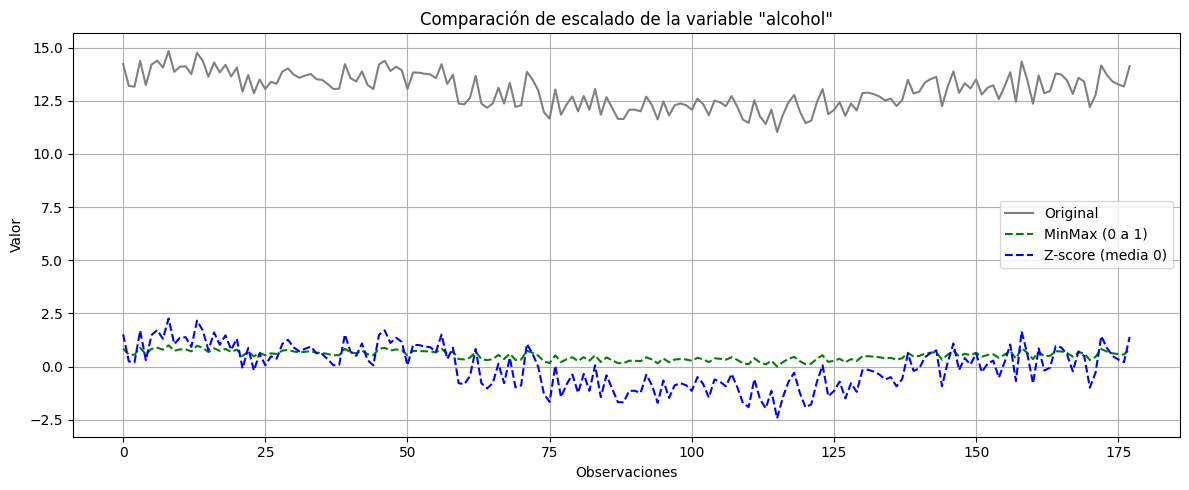

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df['alcohol'], label='Original', color='gray')
plt.plot(df_minmax['alcohol_minmax'], label='MinMax (0 a 1)', linestyle='--', color='green')
plt.plot(df_standard['alcohol_zscore'], label='Z-score (media 0)', linestyle='--', color='blue')
plt.title('Comparación de escalado de la variable "alcohol"')
plt.xlabel('Observaciones')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
